In [9]:
import os

import matplotlib.pyplot as plt
import numpy as np

from Statistical_Analysis import (
    plot_cross_correlation_with_custom_lags
)
from source.Tools import setup_device_and_seed
from source.features_selection import get_feature_lag_config
from source.join_qh_min_data import join_qh_min_data
from source.prepare_data import load_and_preprocess_data

device_info = setup_device_and_seed(seed=987)
device = device_info["device"]

colors = [
    "#52BDEC",  # Light Blue (Logo)
    "#00407A",  # Dark Blue (Logo)
    "#1FABD5",  # Bright Cyan (Grid)
    "#1D8DB0",  # Muted Teal (Grid)
    "#116E8A"   # Dark Teal (Grid)
]
color = "#1FABD5"


Using device: cuda
Current device index: 0, GPU name: NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [10]:
forecast_horizon = 1
qh_parameters = {
    "SI": {"lags": [forecast_horizon,0, -1, -2, -3, -4, -5, -21, -25, -92, -93, -96, -97, -192, -193]},
    "LOAD_RT": {"lags": [-3, -4, -5]},
    "LOAD_ID": {"lags": [3, 2, 1, 0, -1, -2, -3]},
    "LOAD_ID_P90": {"lags": [3, 2, 1, 0, -1, -2, -3]},
    "LOAD_DA": {"lags": [3, 2, 1, 0, -1, -2, -3]},
    "NRV": {"lags": [-1, -2, -3, -4]},
    "NETPOS_BE_ID": {"lags": [22, 14, 13, 9, 8, 4, 1, 0, -1 ]},
    "IP": {"lags": [ -1, -2, -3, -4, -5, -6, -7, -8, -9, -11, -12, -13, -92, -96]},
    "MIP": {"lags": [-1, -2, -3, -4, -6, -96] },
    "MDP": {"lags": [-1, -2, -3, -4, -6, -96] },
    "Hour_sin": {"lags": [0]},
    "Hour_cos": {"lags": [0]},
    "DayOfWeek_sin": {"lags": [0]},
    "DayOfWeek_cos": {"lags": [0]},
    "Month_sin": {"lags": [0]},
    "Month_cos": {"lags": [0]},
    "WIND_ID":  {"lags": [ 11, 4, 3, 2, 1, 0, -1, -2,  -14]},
    "WIND_P90":  {"lags": [ 4, 3, 2, 0, -1, -2,  -10]},
    "WIND_RT":  {"lags": [-1, -2,  -5, -6, -7, -10, -11, -12]},
    "SOLAR_ID":  {"lags": [4, 3, 2, 0, -1, -2, -30]},
    "SOLAR_P90":  {"lags": [ 3, 2, -30]},
    "SOLAR_RT":  {"lags": [-1, -2, -29 ]},
    "GEN_DA": {"lags": [-4, -26, -262]},
    "GDV": {"lags": [-1, -2, -3, -4, -5, -6, -7, -8, -96, -192]},
    "GUV": {"lags": [-1, -2, -3]},
    "IGCC+": {"lags": [-1, -2, -3]},
    "aFRR+": {"lags": [-1, -2, -3, -6, -7, -8, -96, -192]},
    "mFRR+": {"lags": [-1, -2, -3]},
    "IGCC-": {"lags": [-1, -2, -3]},
    "aFRR-": {"lags": [-1, -2, -3, -6, -7, -8, -96, -192]},
    'XB_DA_EXP_France':     {"lags": [ 1, 0, -1, -2, -6, -7]},
    'XB_DA_EXP_Germany':    {"lags": [ 1, 0, -1, -2, -6, -7]},
    'XB_DA_EXP_Netherlands': {"lags": [ 1, 0, -1, -2, -38, -45]},
    'XB_DA_EXP_UnitedKingdom': {"lags": [54, 1, 0, -1, -2]},
    'XB_DA_IMP_France':     {"lags": [ 1, 0, -1, -2, -6, -7, -14]},
    'XB_DA_IMP_Germany':    {"lags": [ 1, 0, -1, -2, -6, -7, -10]},
    'XB_DA_IMP_Netherlands': {"lags": [62, 1, 0, -1, -2, -34]},
    'XB_DA_IMP_UnitedKingdom': {"lags": [39, 1, 0, -1, -2]},
    'XB_DA_NET_France':     {"lags": [ 1, 0, -1, -2, -6, -7]},
    'XB_DA_NET_Germany':    {"lags": [1, 0, -1, -2, -6, -10]},
    'XB_DA_NET_Netherlands': {"lags": [ 1, 0, -1, -34, -45]},
    'XB_DA_NET_UnitedKingdom': {"lags": [ 42, 1, 0, -1, -2]},
    'XB_RT':                {"lags": [ -3, -4, -5, -6, -7, -8, -9, -10]},
    'XB_RT_France':         {"lags": [ -3, -4, -5]},
    'XB_RT_Germany':        {"lags": [ -3, -4, -5, -11]},
    'XB_RT_Luxembourg':     {"lags": [ -3, -4, -5, -14]},
    'XB_RT_Netherlands':    {"lags": [ -3, -4, -5, -33]},
    'XB_RT_UnitedKingdom':  {"lags": [ -3, -4, -5, -6]}
}
minute_parameters = {
    "SI_min": {"lags": [ -2, -3,-4]},
    "NRV_min": {"lags": [-2, -3]},
    # "si_forecast_qh_current": {"lags": [0]},
    # "si_forecast_qh_plus1": {"lags": [0]},
    "IP_min": {"lags": [-2,-3]},
    "MIP_min": {"lags":  [-2,-3]},
    "MDP_min": {"lags":  [-2,-3]},
    "GUV_min": {"lags":  [-2,-3]},
    "IGCC+_min": {"lags":  [-2,-3]},
    "aFRR+_min": {"lags":  [-2,-3]},
    "GDV_min": {"lags":  [-2,-3]},
    "IGCC-_min": {"lags":  [-2,-3]},
    "aFRR-_min": {"lags":  [-2,-3]}

}
hour_parameters = {
    "NETPOS_GB_DA": {"lags": [ 0]},
    "NETPOS_GB_ID": {"lags": [ 0]},
}

In [11]:
#Define original dataset:
qh,minute,hour =load_and_preprocess_data() #2022.01.01_to_2023.12.31
# Define target columns for each dataset
target_qh = "SI"
target_minute = "SI_min"
forecast_horizon = 1
MINUTE = 3
df = join_qh_min_data(
        qh_data=qh,
        minute_data=minute,
        qh_parameters=qh_parameters,
        minute_parameters=minute_parameters,
        minute=MINUTE,
        hour_data=hour,
        hour_parameters=hour_parameters
    )


Loading data from: C:\Users\jds\OneDrive - KU Leuven\Ku Leuven\Master Semester 5\Thesis\Elia\CSV\quarter_hours_data_2022.01.01_to_2024.01.01.h5
Loading data from: C:\Users\jds\OneDrive - KU Leuven\Ku Leuven\Master Semester 5\Thesis\Elia\CSV\minutes_data_2022.01.01_to_2024.01.01.h5
Loading data from: C:\Users\jds\OneDrive - KU Leuven\Ku Leuven\Master Semester 5\Thesis\Elia\CSV\hours_data_2022.01.01_to_2024.01.01.h5
Frequency identified as: qh
Frequency identified as: minute
Frequency identified as: minute


In [12]:
def compute_cross_correlation_with_lags(df, target_series, lags):
    """
    Compute cross-correlation of each feature in df with target_series across provided lags.
    Returns a dict: {feature: ([lags], [correlations])}
    """
    results = {}
    for feature in df.columns:
        lags_list = []
        corr_list = []
        for lag in lags:
            if lag < 0:
                shifted_feature = df[feature].shift(-lag)
                valid_idx = ~shifted_feature.isna() & ~target_series.isna()
                corr = np.corrcoef(shifted_feature[valid_idx], target_series[valid_idx])[0, 1]
            else:
                shifted_target = target_series.shift(lag)
                valid_idx = ~df[feature].isna() & ~shifted_target.isna()
                corr = np.corrcoef(df[feature][valid_idx], shifted_target[valid_idx])[0, 1]
            lags_list.append(lag)
            corr_list.append(corr)
        results[feature] = (lags_list, corr_list)
    return results

In [13]:
def plot_cross_correlation_results(results, target_name='target', top_n=None, threshold=None, lags=None):
    """
    Plots per-feature cross-correlation across lags,
    and a ranked barh plot of top (feature, lag) pairs either by top_n or threshold.

    Args:
        results: dict from compute_cross_correlation_with_lags
        target_name: str, name of the target variable (for titles)
        top_n: int, number of top (feature, lag) pairs by absolute correlation to display
        threshold: float, minimum absolute correlation to include in the ranked plot
    """
    i=0
    # Reset to default matplotlib settings
    plt.rcdefaults()
    # 🔹 Per-feature lag plots
    for feature, (lags_list, corr_list) in results.items():
        fig = plt.figure(figsize=(8, 4))
        plt.bar(lags_list, corr_list, color=color, width=0.8)
        plt.title(f"{feature} vs {target_name}",fontsize=20)
        plt.xlabel("Lag (in quarter-hours)",fontsize=20)
        plt.ylabel("Correlation coefficient",fontsize=20)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.axhline(0, color='black', linestyle='--')
        plt.tight_layout()
        plt.show()
        # Save if output is True
        if output:
            i+=1
            lag_start = lags.start
            lag_end = lags.stop - 1
            filename = os.path.join(f"/Users/jds/Desktop/cross_correlations/", f"cross_{i}_{feature}_lags{lag_start}to{lag_end}.png")
            fig.savefig(filename, dpi=300)

    # 🔸 Flatten and filter correlations
    all_correlations = [
        (feature, lag, corr)
        for feature, (lags_list, corr_list) in results.items()
        for lag, corr in zip(lags_list, corr_list)
    ]

    if threshold is not None:
        filtered = [x for x in all_correlations if abs(x[2]) >= threshold]
        filtered.sort(key=lambda x: abs(x[2]), reverse=True)
    elif top_n is not None:
        filtered = sorted(all_correlations, key=lambda x: abs(x[2]), reverse=True)[:top_n]
    else:
        raise ValueError("Either `top_n` or `threshold` must be provided.")

    if not filtered:
        print("No correlations above the given threshold.")
        return

    labels = [f"{feat}_lag{lag}" for feat, lag, _ in filtered]
    values = [corr for _, _, corr in filtered]

    height_per_bar = 0.4  # adjust depending on font size
    fig_height = max(4, height_per_bar * len(labels))  # minimum 4 inches tall
    fig = plt.figure(figsize=(12, fig_height))
    plt.barh(labels, values, color=color)
    plt.axvline(0, color='black', linestyle='--')
    plt.xlabel("Cross-correlation with target",fontsize=14)
    plt.title("Most Correlated (Feature, Lag) Pairs",fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    if output:
        if top_n is not None:
            filename = os.path.join(f"/Users/jds/Desktop/cross_correlations/", f"cross_top_{top_n}.png")
        if threshold is not None:
            filename = os.path.join(f"/Users/jds/Desktop/cross_correlations/",f"cross_thres_{threshold}.png")
        fig.savefig(filename, dpi=300)





In [14]:
def count_strong_correlations(results, threshold=0.3):
    """
    Count number of (feature, lag) pairs with |correlation| >= threshold.
    Also returns a summary list.
    """
    count = 0
    strong_corrs = []

    for feature, (lags_list, corr_list) in results.items():
        for lag, corr in zip(lags_list, corr_list):
            if abs(corr) >= threshold:
                count += 1
                strong_corrs.append((feature, lag, corr))

    return count, strong_corrs


In [15]:
def rank_and_display_correlations(correlations, threshold=0.05, top_n=None, title="Correlation Ranking"):
    """
    Sort and print correlations (dict of {feature: ([lags], [correlations])})
    """
    flat_corrs = {
        f: v[1][0] if isinstance(v, tuple) and isinstance(v[1], list) and len(v[1]) == 1 else v
        for f, v in correlations.items()
    }
    sorted_corr = sorted(flat_corrs.items(), key=lambda x: abs(x[1]), reverse=True)
    filtered = [(f, r) for f, r in sorted_corr if abs(r) >= threshold]
    if top_n:
        filtered = filtered[:top_n]

    print(f"\n{title}")
    print(f"{'Feature':30s} → Correlation")
    print("-" * 45)
    for i, (f, r) in enumerate(filtered, 1):
        print(f"{i:02d}. {f:30s} → {r:.3f}")

    return filtered


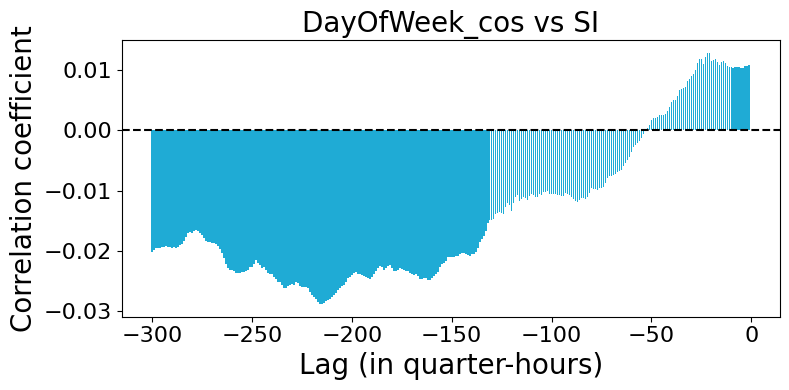

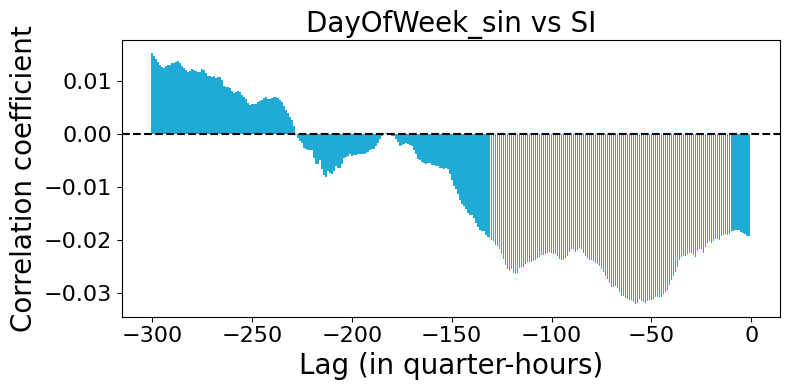

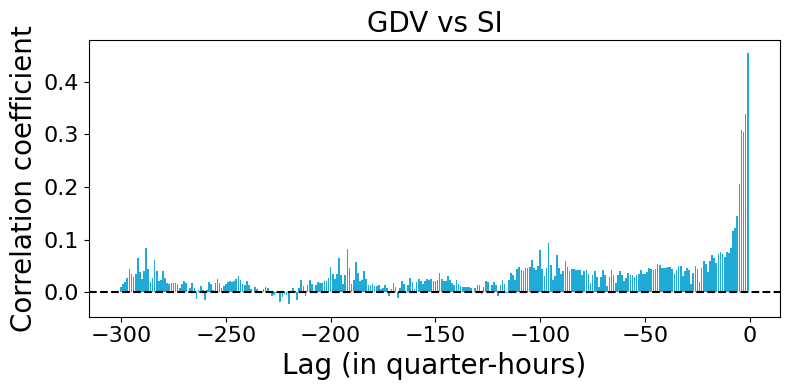

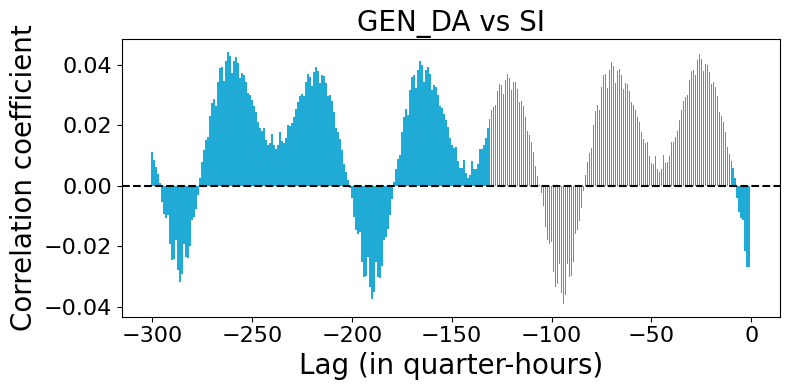

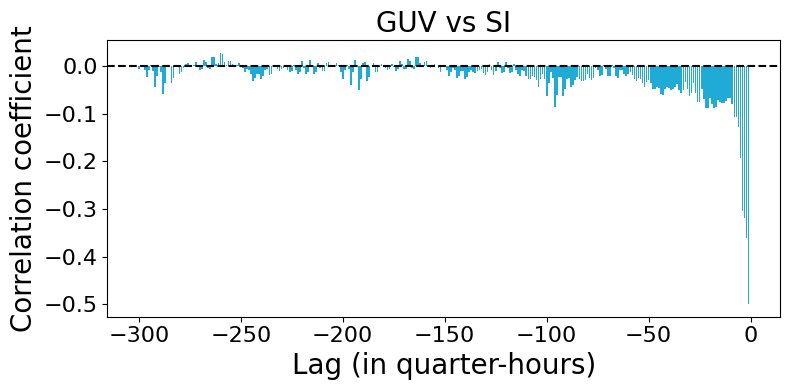

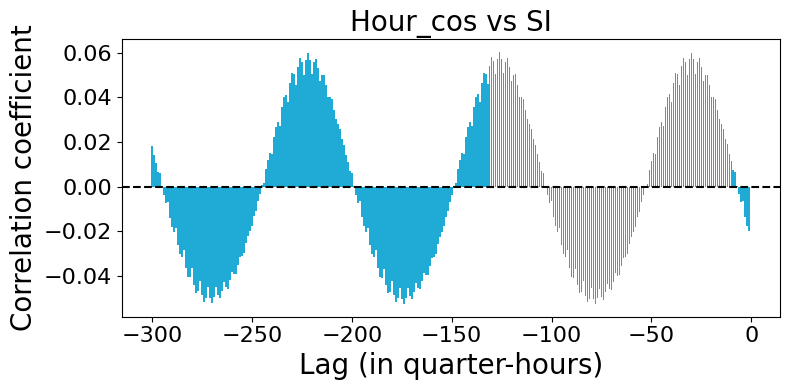

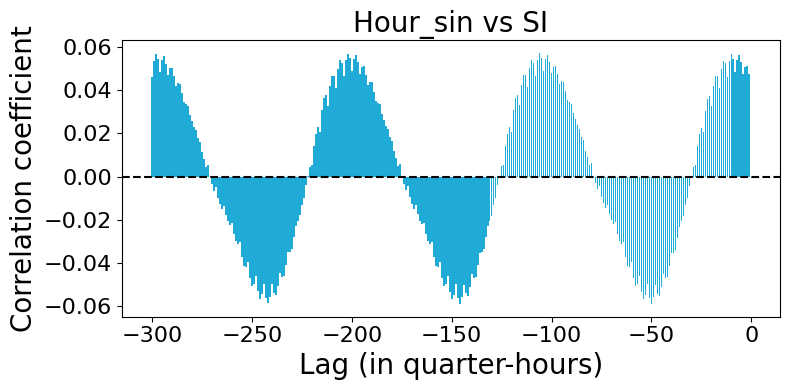

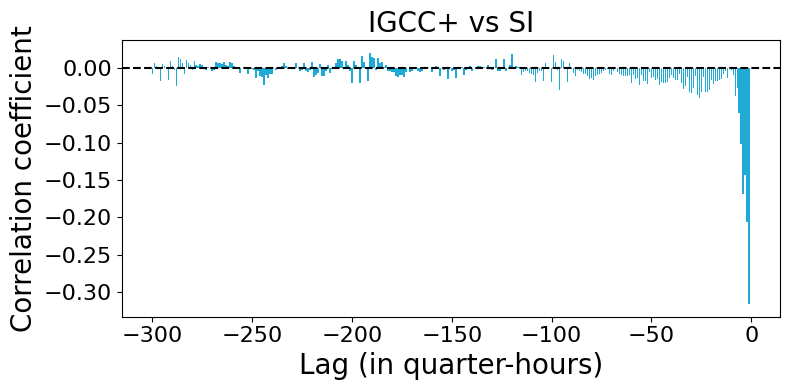

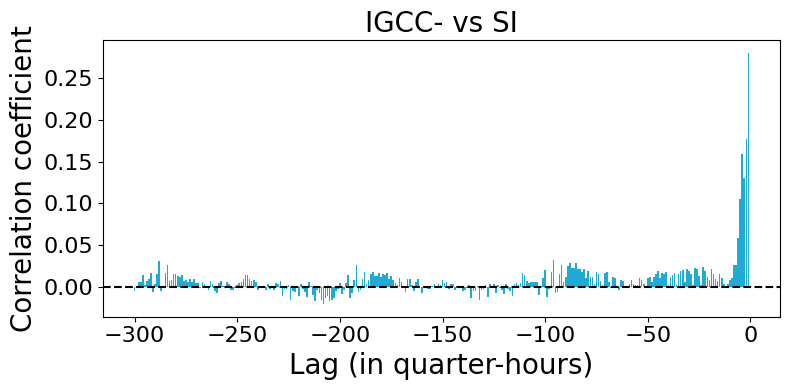

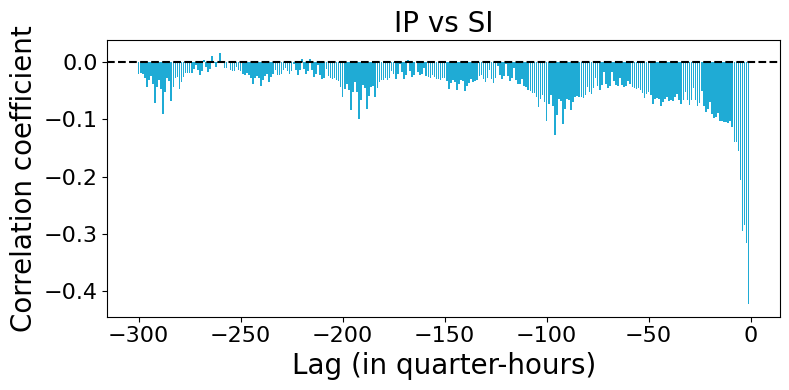

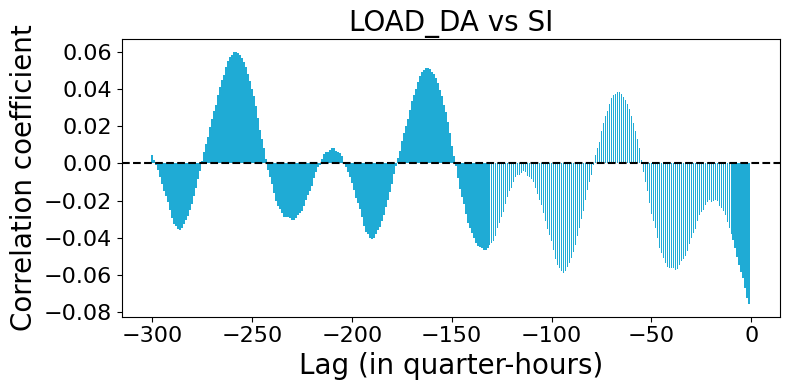

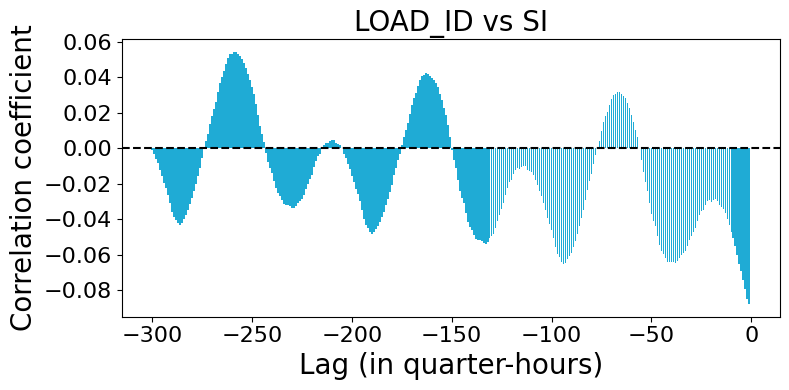

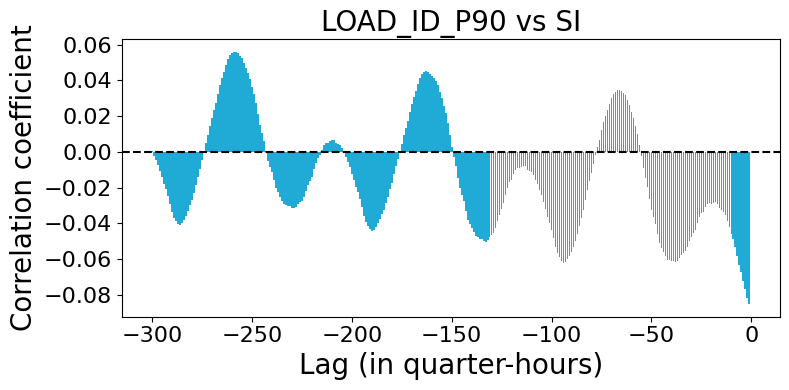

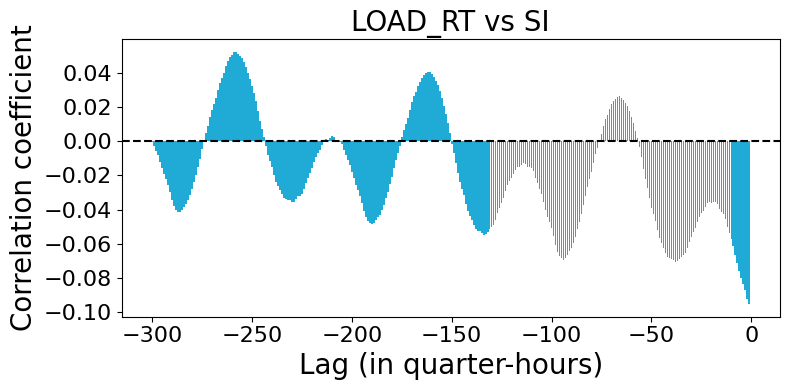

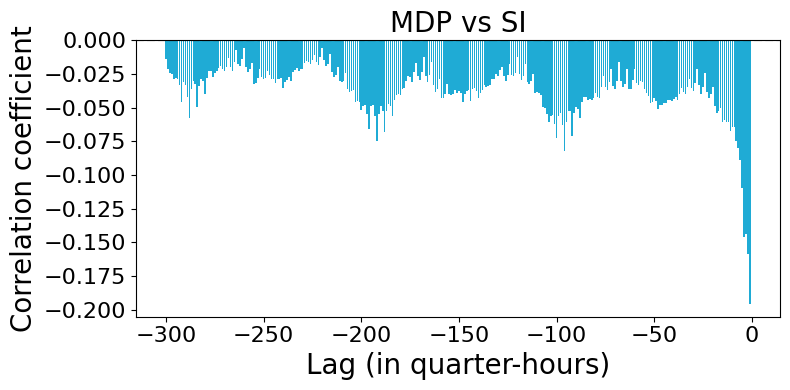

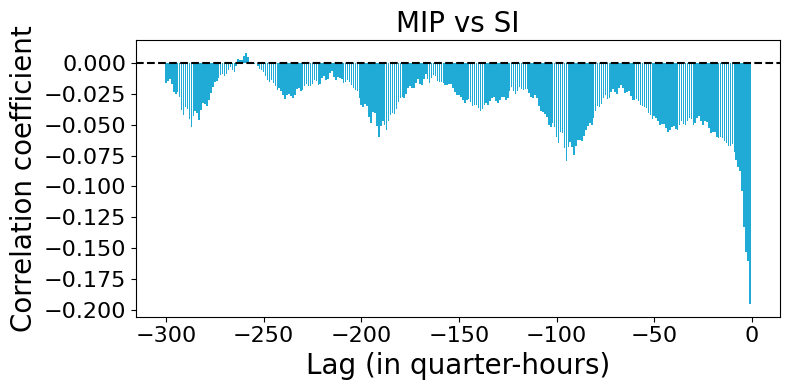

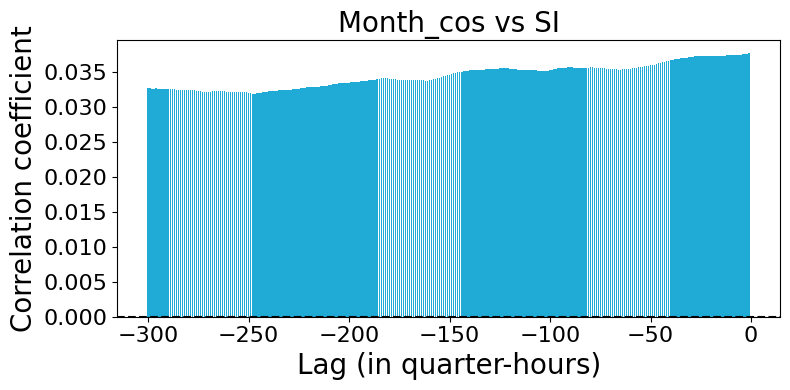

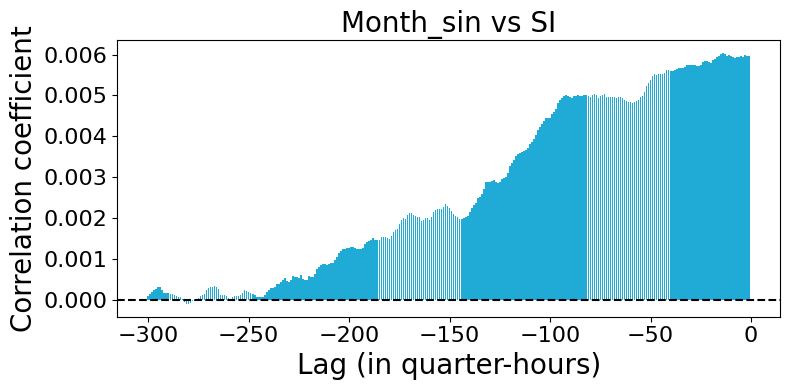

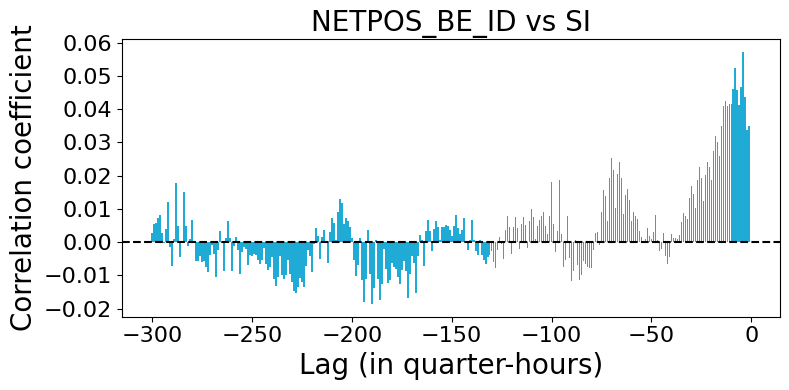

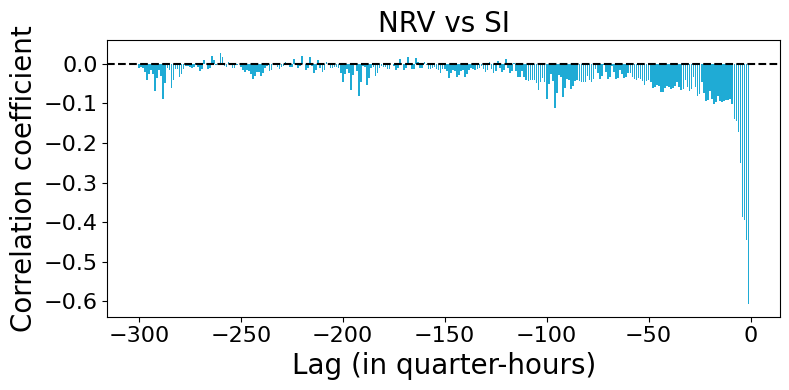

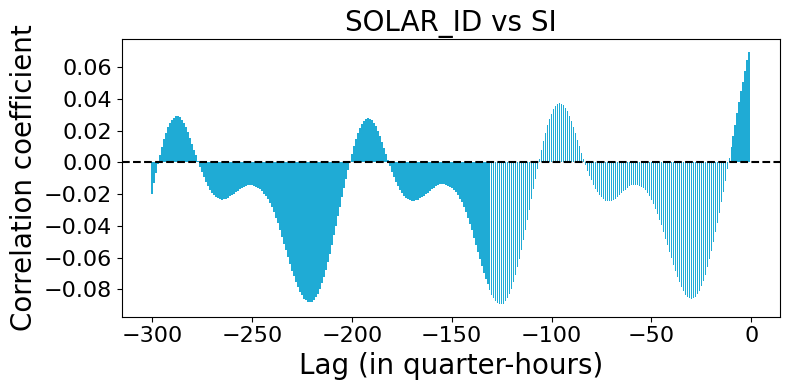

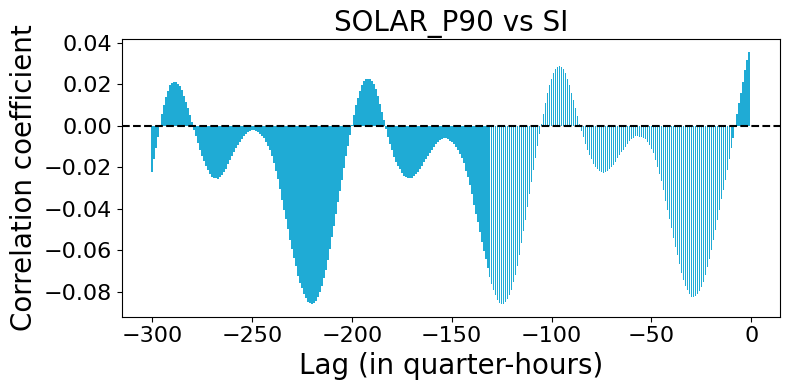

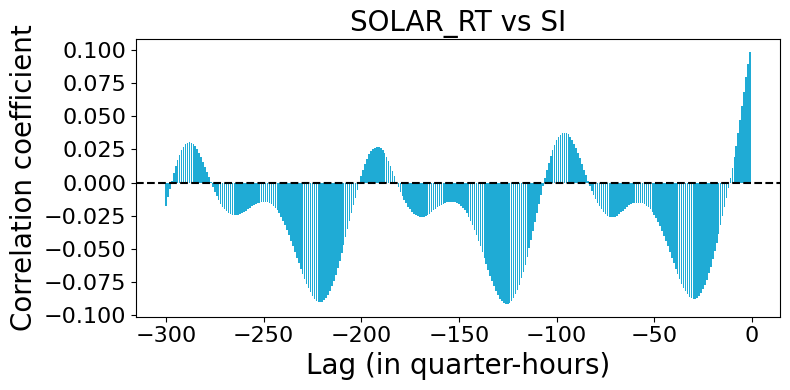

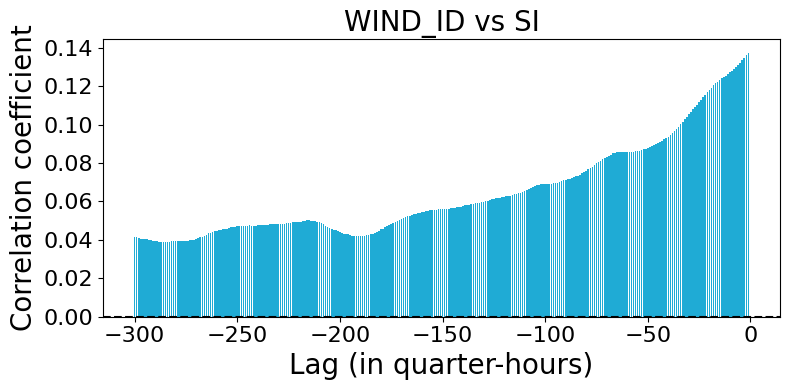

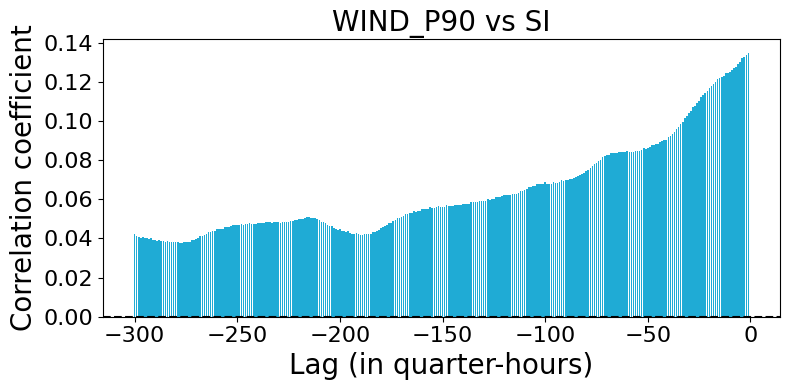

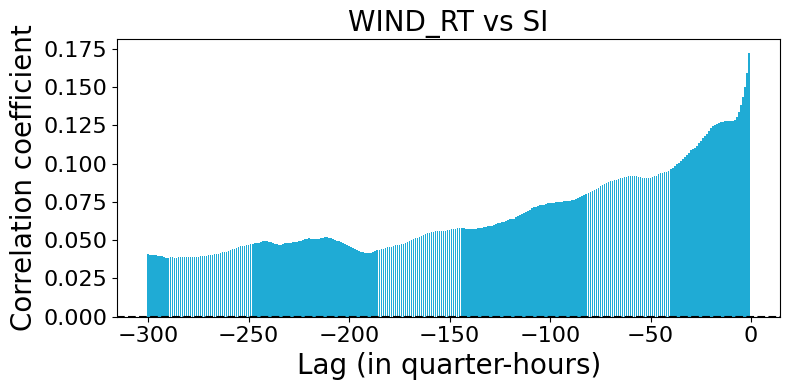

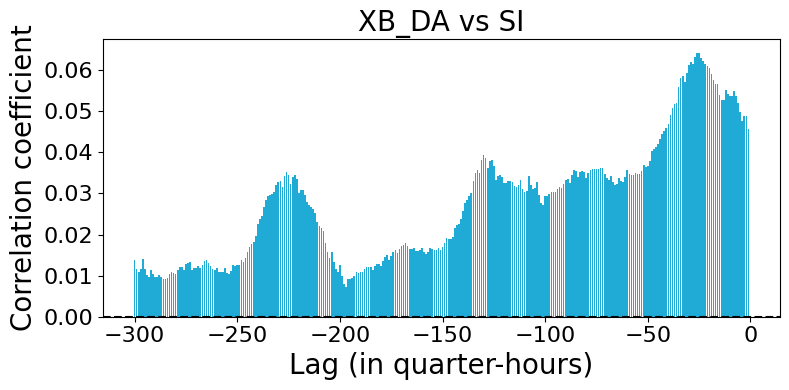

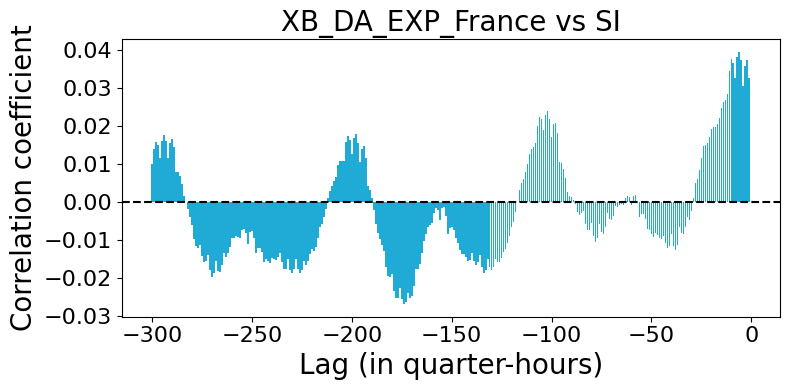

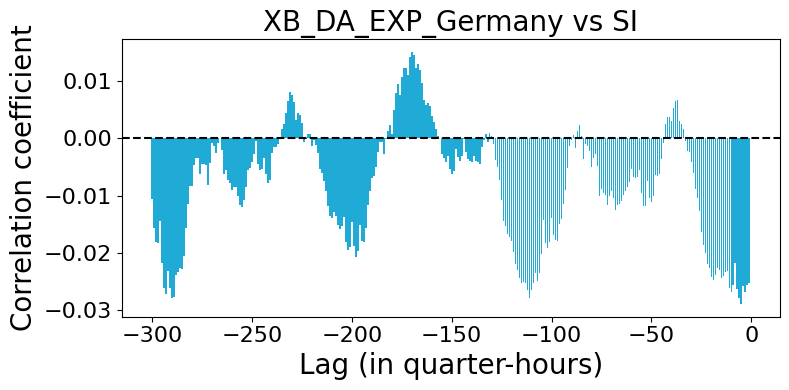

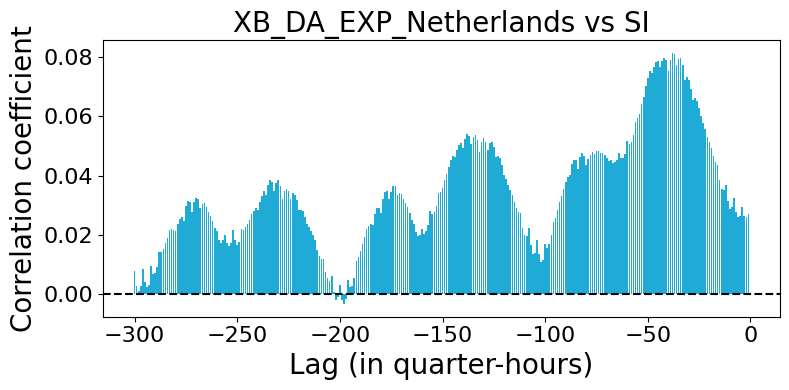

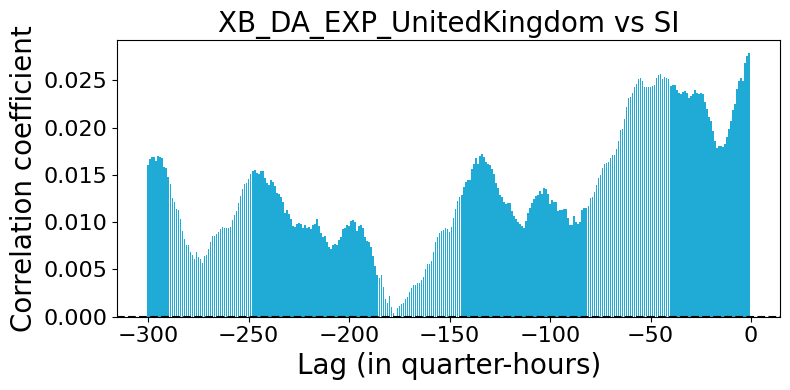

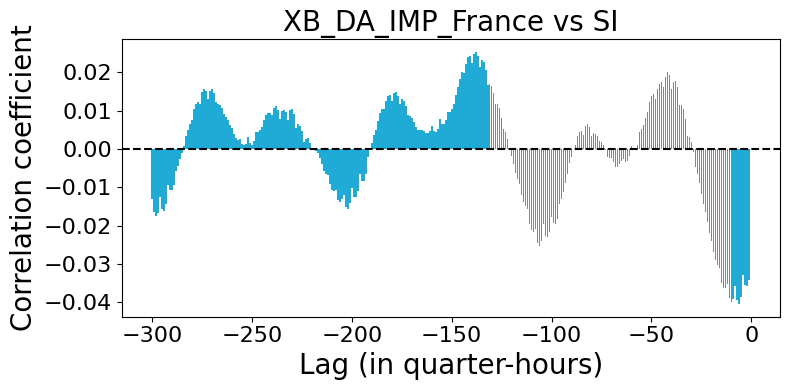

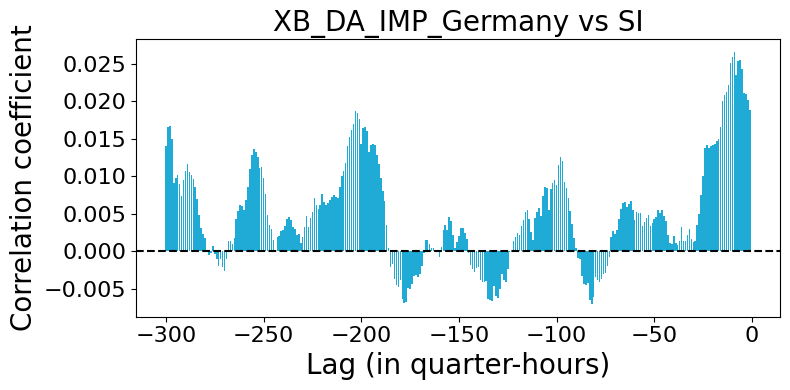

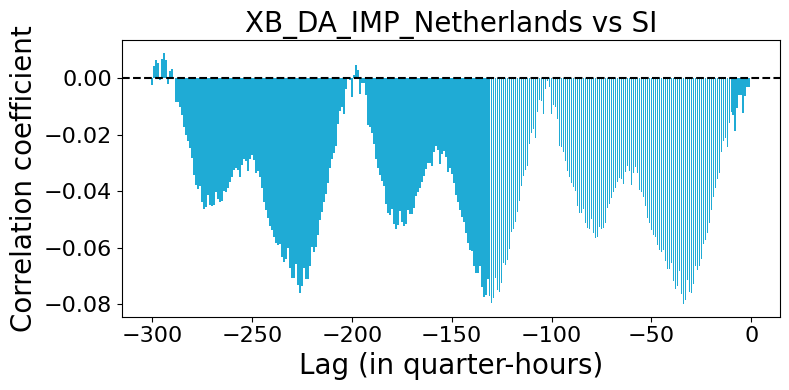

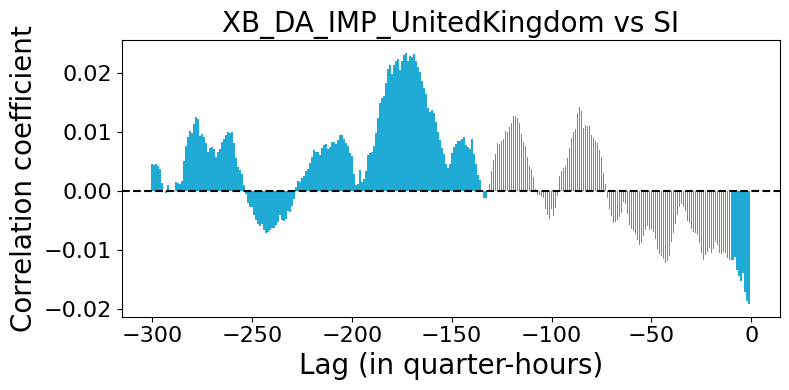

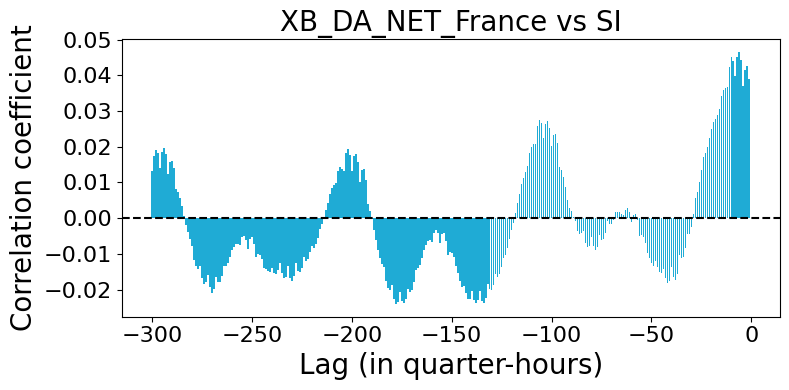

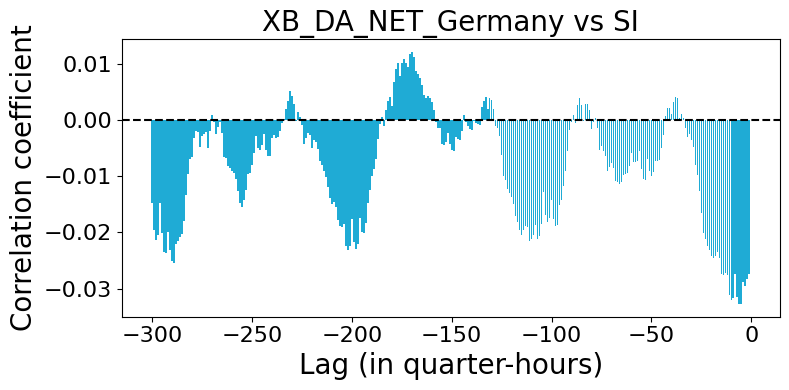

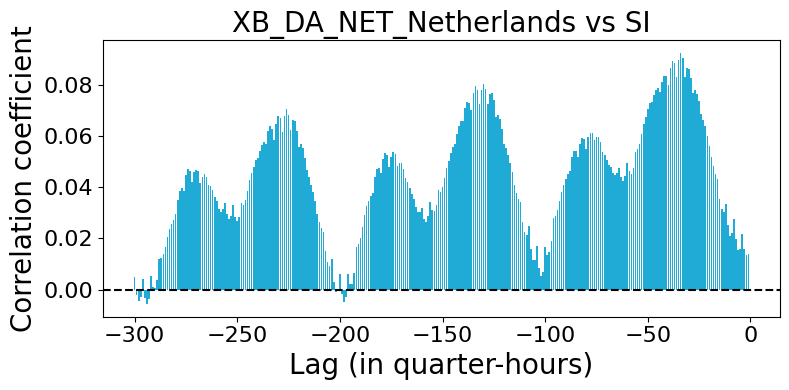

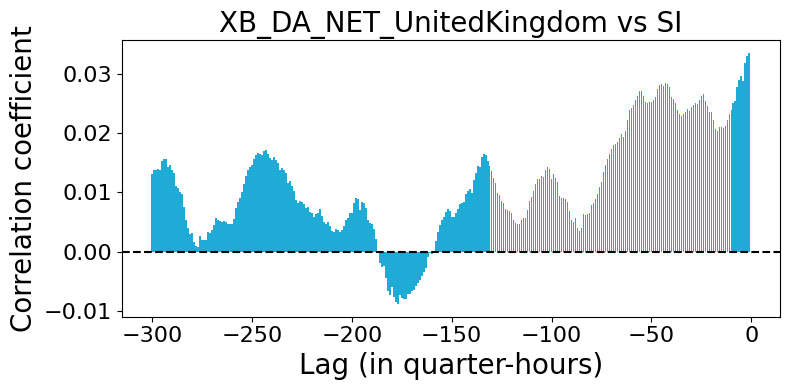

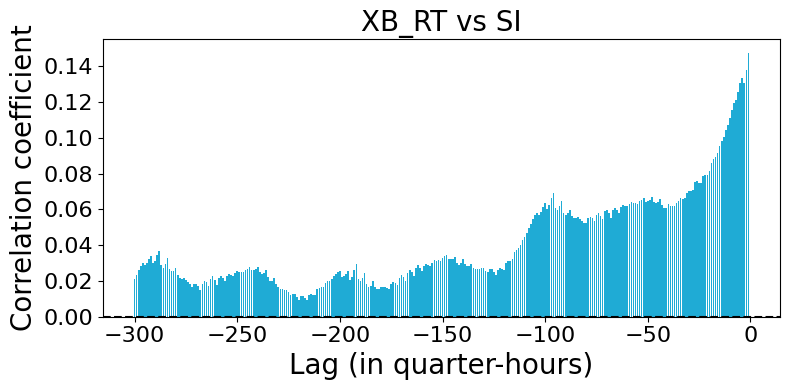

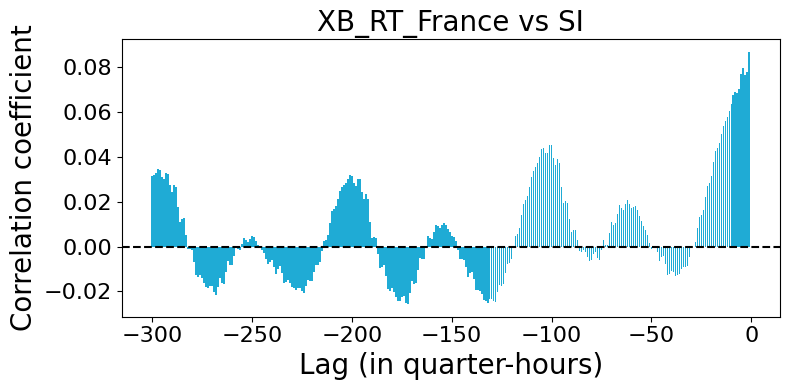

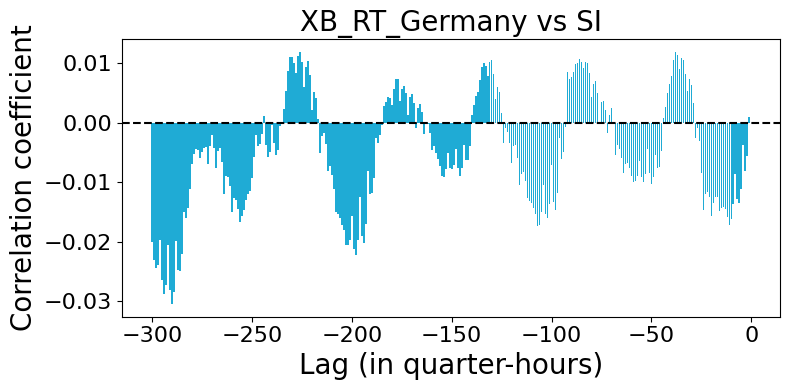

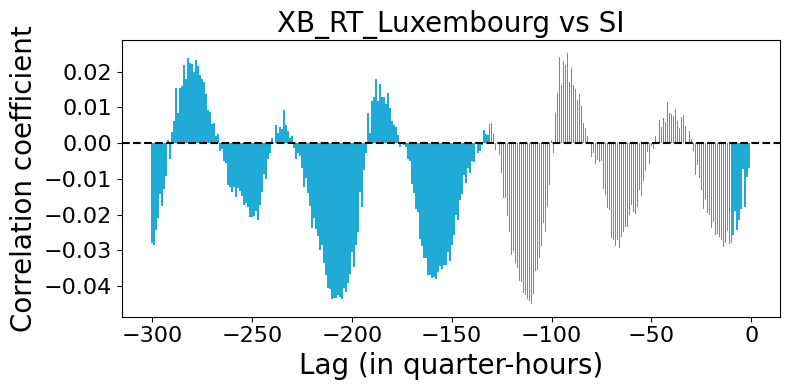

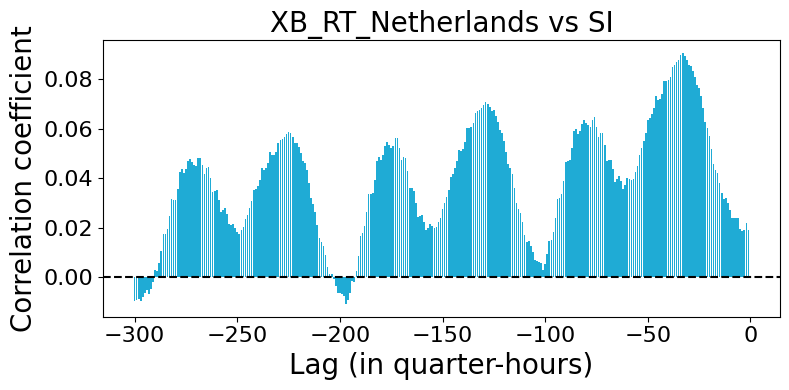

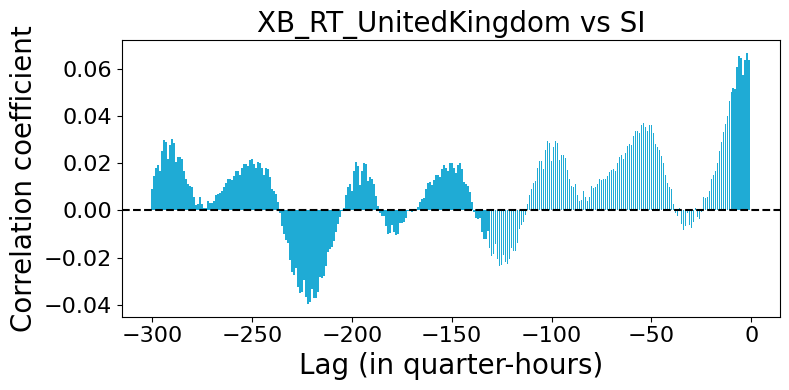

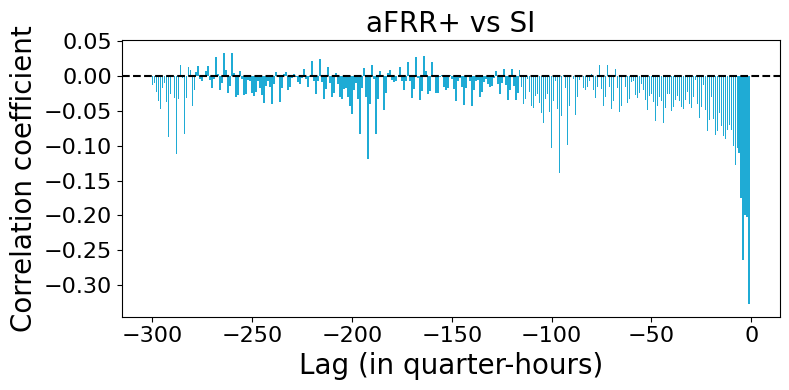

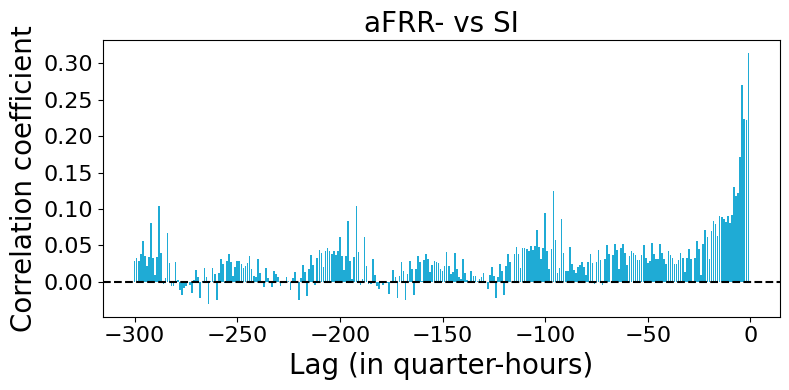

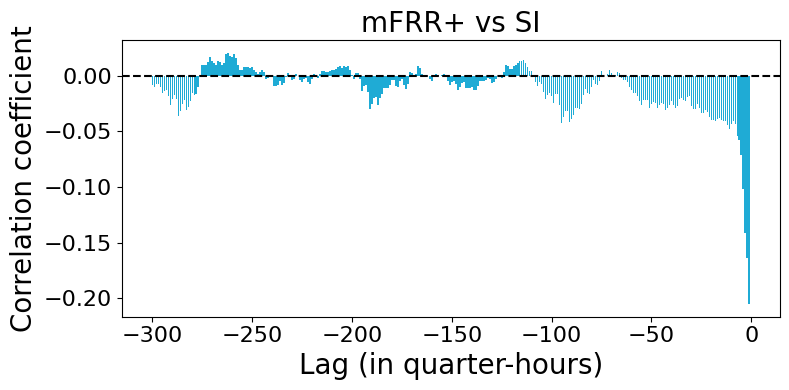

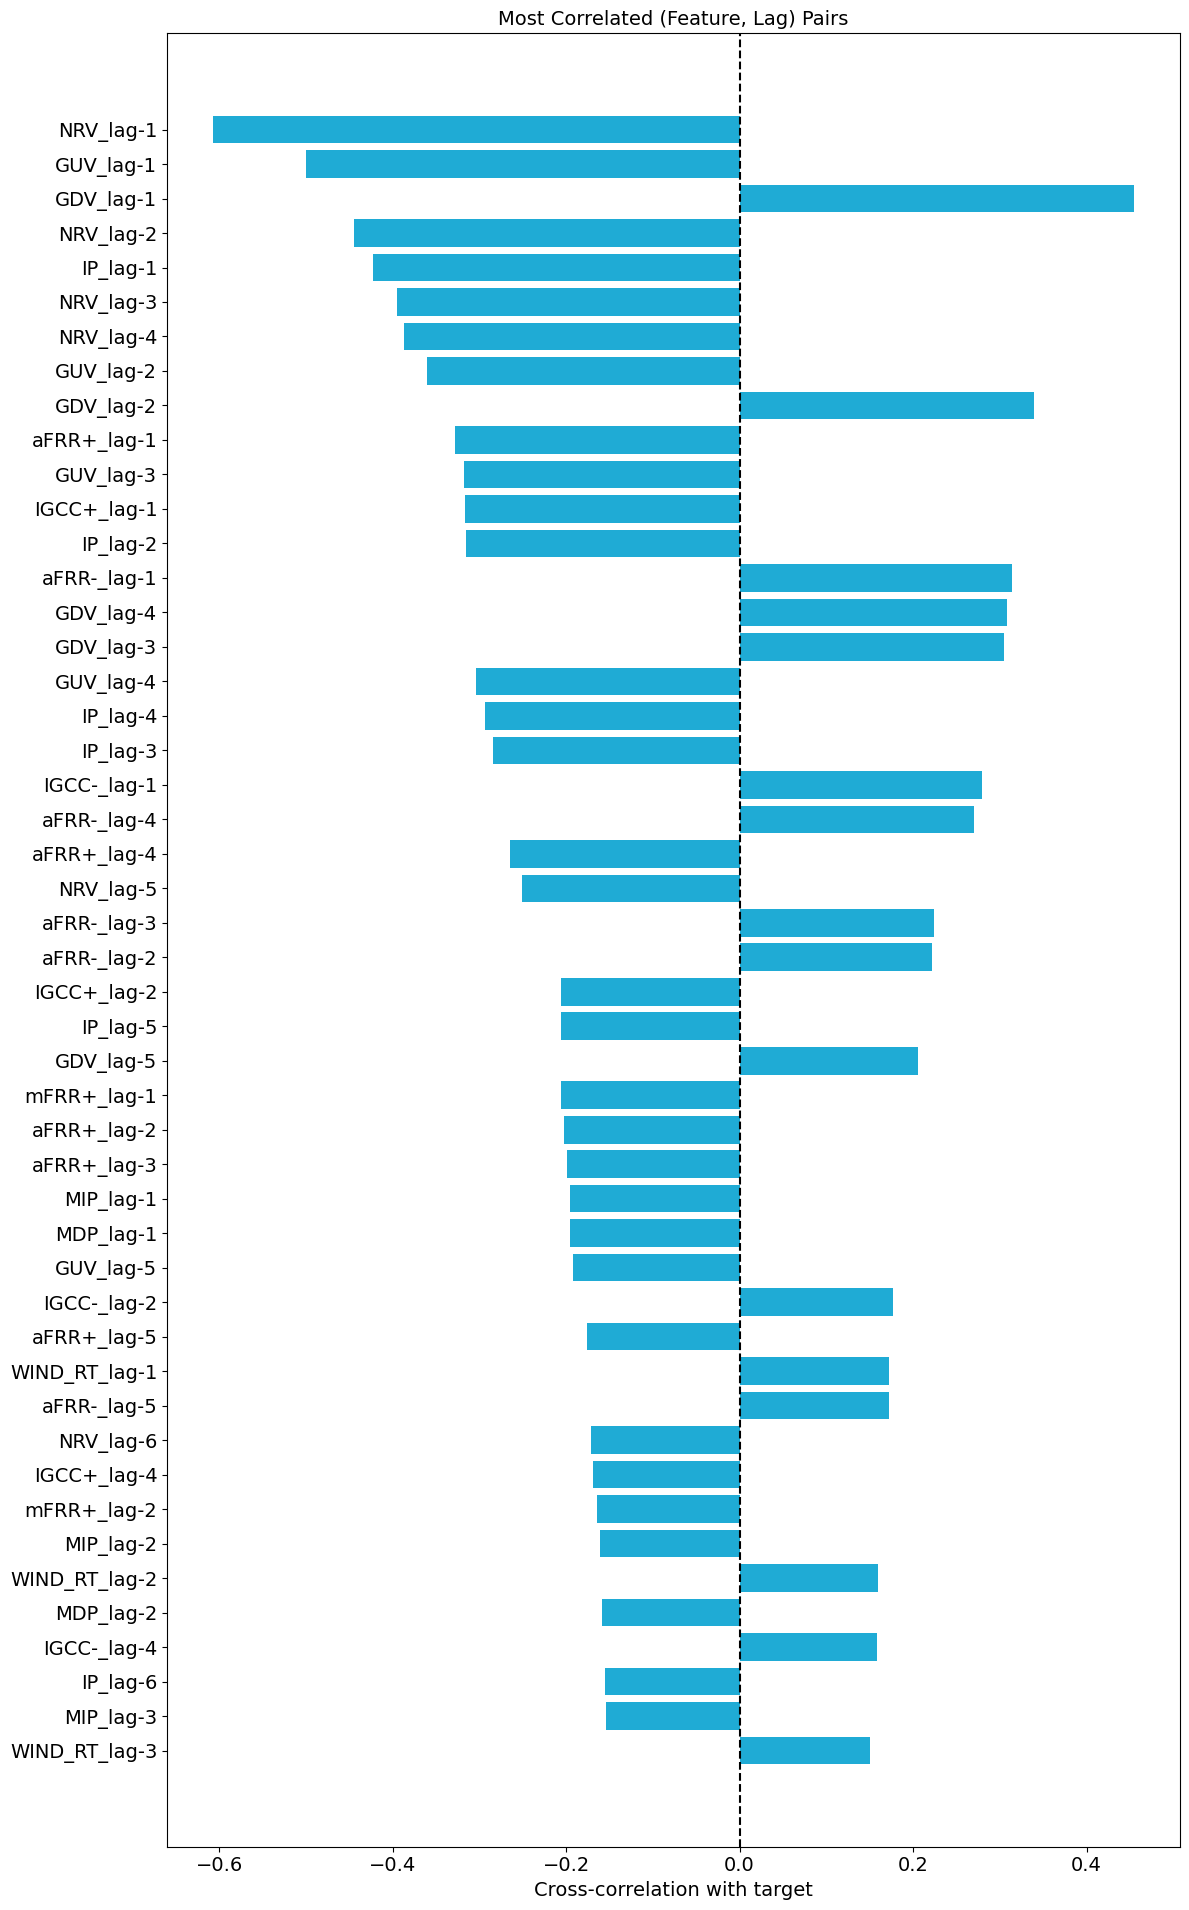

Number of (feature, lag) pairs with |correlation| ≥ 0.05: 2059


In [16]:
output = False
# features_to_drop = [
#     "France", "Germany", "Luxembourg", "Netherlands", "UnitedKingdom",
#     "Import_UnitedKingdom", "Import_Germany", "Import_Netherlands", "Import_France",
#     "Export_UnitedKingdom", "Export_Germany", "Export_Netherlands", "Export_France"
# ]
lags = range(-300, 0)
# Only keep numeric features
features = qh.drop(columns=[target_qh]).select_dtypes(include=[np.number])
# features = features.drop(columns=features_to_drop)
target_series = qh[target_qh]

results = compute_cross_correlation_with_lags(features, target_series, lags)

plot_cross_correlation_results(results, target_name=target_qh, threshold=0.15, lags=lags)

threshold = 0.05
count, strong_corrs = count_strong_correlations(results, threshold=threshold)
print(f"Number of (feature, lag) pairs with |correlation| ≥ {threshold}: {count}")

In [17]:
# Step 1: Drop non-numeric and target from features
qh_clean = qh.drop(columns=[target_qh] ).select_dtypes(include=[np.number])

# Step 2: Shift the target by -1 and add as a new column (lag -1 means previous timestep)
qh_clean["system_imbalance_lag"] = qh[target_qh].shift(-2)

# Step 3: Define the (current) target series
qh_target = qh[target_qh]

# Step 4: Compute correlation of all features including Lag1_Target at lag=-1
qh_corrs = compute_cross_correlation_with_lags(qh_clean, qh_target, lags=[-1])

# Step 5: Rank and display
ranked_qh = rank_and_display_correlations(qh_corrs, threshold=0.05, top_n=20,title="Top Lag -1 Correlations" )


Top Lag -1 Correlations
Feature                        → Correlation
---------------------------------------------
01. system_imbalance_lag           → 0.654
02. NRV                            → -0.607
03. GUV                            → -0.500
04. GDV                            → 0.455
05. IP                             → -0.422
06. aFRR+                          → -0.328
07. IGCC+                          → -0.316
08. aFRR-                          → 0.314
09. IGCC-                          → 0.279
10. mFRR+                          → -0.205
11. MIP                            → -0.196
12. MDP                            → -0.196
13. WIND_RT                        → 0.172
14. XB_RT                          → 0.148
15. WIND_ID                        → 0.138
16. WIND_P90                       → 0.135
17. SOLAR_RT                       → 0.098
18. LOAD_RT                        → -0.096
19. LOAD_ID                        → -0.088
20. XB_RT_France                   → 0.087


In [18]:
# Step 1: Drop non-numeric and target from features
minute_clean = minute.drop(columns=[target_minute]).select_dtypes(include=[np.number])

# Step 2: Shift target by -1 and insert as feature
minute_clean["si_min"] = minute[target_minute].shift(-3) #only available at min 3

# Step 3: Define the target (still unshifted)
minute_target = minute[target_minute]

# Step 4: Compute correlation of each feature (including Lag1_Target) at lag=-1
minute_corrs = compute_cross_correlation_with_lags(minute_clean, minute_target, lags=[-1])

# Step 5: Rank and display
ranked_minute = rank_and_display_correlations(minute_corrs, threshold=0.05, title="Minute Data Correlation with Lag -1 (including Lagged Target)")



Minute Data Correlation with Lag -1 (including Lagged Target)
Feature                        → Correlation
---------------------------------------------
01. si_min                         → 0.937
02. NRV_min                        → -0.903
03. GUV_min                        → -0.752
04. GDV_min                        → 0.687
05. IP_min                         → -0.636
06. aFRR+_min                      → -0.525
07. IGCC+_min                      → -0.502
08. aFRR-_min                      → 0.487
09. IGCC-_min                      → 0.480
10. MDP_min                        → -0.299
11. MIP_min                        → -0.280


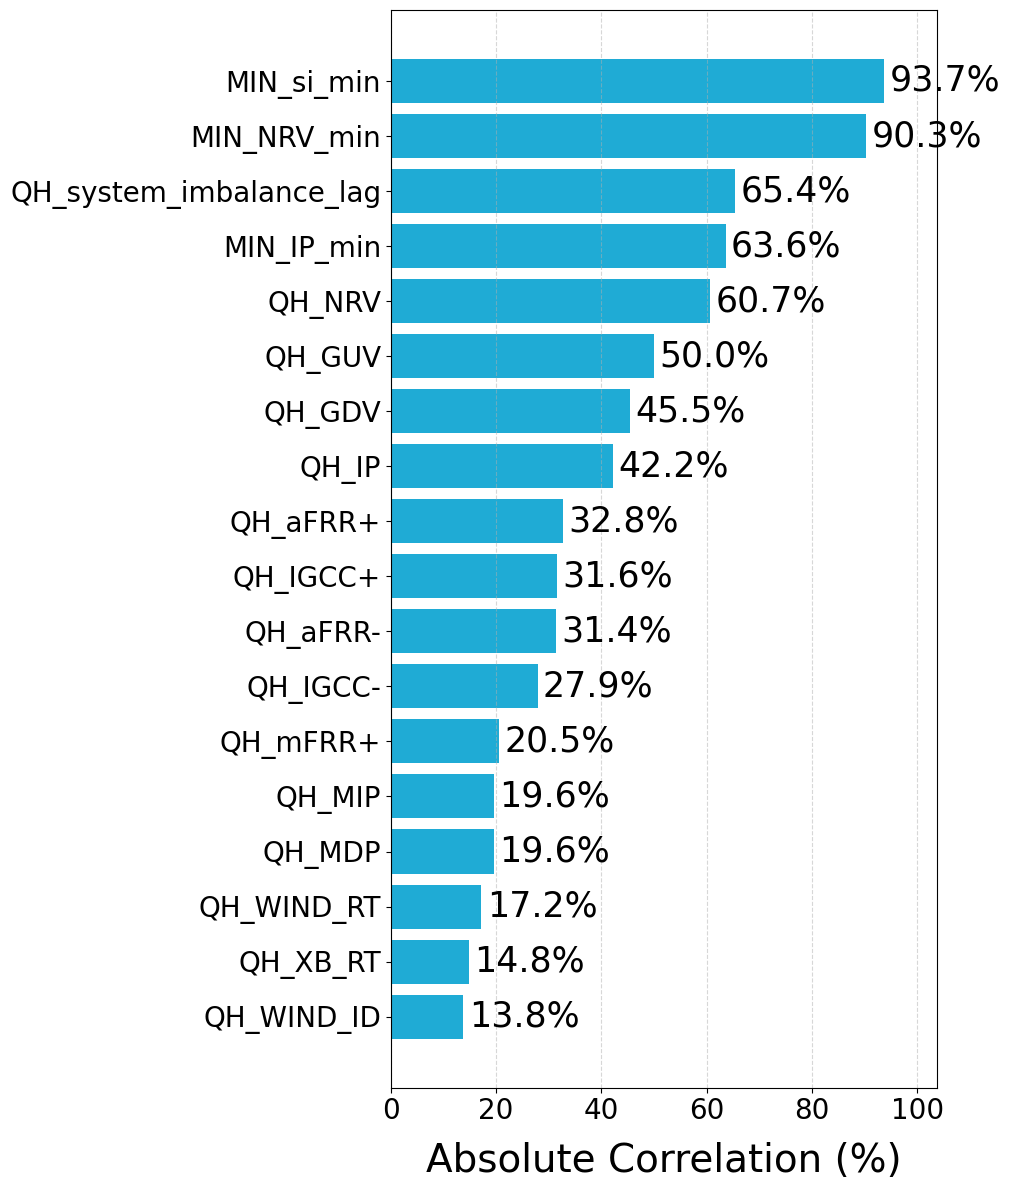

In [19]:
top_n = 18  # Change this to however many top features you want to show
drop_minute_features = ["GUV_min", "GDV_min", "aFRR+_min", "aFRR-_min", "IGCC+_min", "IGCC-_min", "MDP_min", "MIP_min"]

# Filter and prefix
minute_corrs_filtered = {k: v for k, v in minute_corrs.items() if k not in drop_minute_features}
qh_corrs_prefixed = {f"QH_{k}": v for k, v in qh_corrs.items()}
minute_corrs_prefixed = {f"MIN_{k}": v for k, v in minute_corrs_filtered.items()}
combined_corrs = {**qh_corrs_prefixed, **minute_corrs_prefixed}


# Sort by absolute max correlation
sorted_corrs = sorted(
    combined_corrs.items(),
    key=lambda x: max([abs(c) for c in x[1][1]]),
    reverse=True
)[:top_n]

features, values = zip(*sorted_corrs)
percentages = [round(max([abs(c) for c in v[1]]) * 100, 1) for v in values]

# --- Assign colors based on prefix ---
colors = [color if f.startswith("QH_") else color for f in features]

# --- Plotting ---
fig = plt.figure(figsize=(10, 12))
bars = plt.barh(features[::-1], percentages[::-1], color=colors[::-1])

plt.xlabel("Absolute Correlation (%)", fontsize=28, labelpad=12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add percentage labels
for bar, pct in zip(bars, percentages[::-1]):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f"{pct}%",
             va='center', ha='left', fontsize=25)

plt.xlim(0, max(percentages) + 10)
plt.tight_layout()
plt.show()
output=False
# Save if enabled
if output:
    fig.savefig(f"/Users/jds/Desktop/cross_correlations/cross_abs_ranking_top{top_n}.png", dpi=300)


In [20]:
def show_top_lagged_correlations(features, target_series, lags, top_n=None, threshold=None):
    # Step 1: compute cross-correlation per feature and lag
    results = compute_cross_correlation_with_lags(features, target_series, lags)

    # Step 2: flatten results into list of tuples
    all_correlations = [
        (feature, lag, corr)
        for feature, (lags_list, corr_list) in results.items()
        for lag, corr in zip(lags_list, corr_list)
    ]

    # Step 3: filter based on threshold or top_n
    if threshold is not None:
        filtered = [x for x in all_correlations if abs(x[2]) >= threshold]
        filtered.sort(key=lambda x: abs(x[2]), reverse=True)
    elif top_n is not None:
        filtered = sorted(all_correlations, key=lambda x: abs(x[2]), reverse=True)[:top_n]
    else:
        raise ValueError("Either `top_n` or `threshold` must be provided.")

    # Step 4: check if anything is left
    if not filtered:
        print("No correlations above the given threshold.")
        return []

    # Step 5: format and show results
    print(f"{'Feature':<25} {'Lag':<6} {'Correlation':<10}")
    print("-" * 45)
    for feature, lag, corr in filtered:
        print(f"{feature:<25} {lag:<6} {corr:.4f}")

    # Optional: return for further processing
    return filtered

features = qh.select_dtypes(include=[np.number])
features2 = minute.select_dtypes(include=[np.number])
# features = features.drop(columns=features_to_drop)
target_series = qh[target_qh]
target_series2 = minute[target_minute]
top_features_qh = show_top_lagged_correlations(
    features=features,
    target_series=target_series,
    lags = range(-300, 50),
    top_n=500  # Or use threshold=0.3
)
top_features_minute = show_top_lagged_correlations(
    features=features2,
    target_series=target_series2,
    lags = range(-100, -2),
    top_n=200  # Or use threshold=0.3
)
# Step 2: Combine into one super list
super_correlations = top_features_qh + top_features_minute

# Step 3: Sort by absolute correlation (descending)
super_correlations_sorted = sorted(super_correlations, key=lambda x: abs(x[2]), reverse=True)

# Step 4 (optional): Get top-N overall
top_combined = super_correlations_sorted[:300]  # Or any number you want



Feature                   Lag    Correlation
---------------------------------------------
SI                        0      1.0000
NRV                       0      -0.9524
GUV                       0      -0.7852
NRV                       1      -0.7245
GDV                       0      0.7118
SI                        -1     0.6536
SI                        1      0.6536
IP                        0      -0.6506
GUV                       1      -0.6461
NRV                       -1     -0.6069
aFRR+                     0      -0.5761
aFRR-                     0      0.5474
IP                        1      -0.5368
GUV                       -1     -0.4995
NRV                       2      -0.4944
GDV                       1      0.4817
IGCC+                     0      -0.4816
SI                        -2     0.4607
SI                        2      0.4607
GUV                       2      -0.4552
GDV                       -1     0.4546
NRV                       -2     -0.4440
IGCC-           

In [21]:
# Features that can use positive lags (i.e., forecasting aids)
# ✅ Features that can use positive lags (i.e., future info is allowed)
FEATURES_ALLOW_LEADS = {
    "LOAD_ID", "LOAD_ID_P90", "LOAD_DA",
    "WIND_ID", "WIND_P90",
    "SOLAR_ID", "SOLAR_P90",
    "NETPOS_BE_ID", "NETPOS_GB_ID", "NETPOS_GB_DA",
    "XB_DA_NET_France", "XB_DA_NET_Germany", "XB_DA_NET_Netherlands", "XB_DA_NET_UnitedKingdom",
    "XB_DA_EXP_France", "XB_DA_EXP_Germany", "XB_DA_EXP_Netherlands", "XB_DA_EXP_UnitedKingdom",
    "XB_DA_IMP_France", "XB_DA_IMP_Germany", "XB_DA_IMP_Netherlands", "XB_DA_IMP_UnitedKingdom",
    "Hour_sin", "Hour_cos", "DayOfWeek_sin", "DayOfWeek_cos", "Month_sin", "Month_cos"
}

# ✅ Features that should remain strictly causal
FEATURES_CASUAL_ONLY = {
    "SI", "NRV", "IP", "MIP", "MDP", "GEN_DA", "GDV", "GUV",
    "IGCC+", "IGCC-", "aFRR+", "aFRR-", "mFRR+",
    "LOAD_RT", "SOLAR_RT", "WIND_RT",
    "SI_min", "NRV_min", "IP_min", "MIP_min", "MDP_min", "GUV_min",
    "IGCC+_min", "IGCC-_min", "aFRR+_min", "aFRR-_min", "GDV_min",
    "XB_RT", "XB_RT_France", "XB_RT_Germany", "XB_RT_Luxembourg", "XB_RT_Netherlands", "XB_RT_UnitedKingdom"
}
# Add resolution info to each item (feature, lag, correlation)
tagged_qh = [("qh", feat, lag, corr) for feat, lag, corr in top_features_qh]
tagged_minute = [("minute", feat, lag, corr) for feat, lag, corr in top_features_minute]
combined_ranked = sorted(tagged_qh + tagged_minute, key=lambda x: abs(x[3]), reverse=True)

def build_separated_lag_dicts(combined_ranked, features_with_leads, features_causal_only):
    qh_dict = {}
    min_dict = {}
    hour_dict = {}

    for resolution, feat, lag, corr in combined_ranked:
        # ❗ Correct causal filtering logic
        if feat in features_causal_only:
            if lag >= 0:
                continue  # Strictly causal → only past lags
        elif feat in features_with_leads:
            pass  # Allow any lag
        else:
            continue  # Unknown → skip

        # Decide on resolution
        if feat.endswith("_min"):
            target_dict = min_dict

        else:
            target_dict = qh_dict

        if feat not in target_dict:
            target_dict[feat] = {"lags": [lag]}
        elif lag not in target_dict[feat]["lags"]:
            target_dict[feat]["lags"].append(lag)

    return qh_dict, min_dict, hour_dict


from collections import defaultdict

def build_lag_dict_from_ranking(correlation_ranking, allowed_leads, causal_only):
    lag_dict = defaultdict(set)

    for feature, lag, score in correlation_ranking:
        if feature in causal_only:
            if lag >= 0:
                continue  # disallow current/future values
        elif feature in allowed_leads:
            pass  # allow all lags
        else:
            continue  # unknown → skip

        lag_dict[feature].add(lag)

    return {k: {"lags": sorted(v)} for k, v in lag_dict.items()}

def tag_resolution(top_combined, minute_feature_names):
    tagged = []
    for feat, lag, corr in top_combined:
        resolution = "minute" if feat in minute_feature_names else "qh"
        tagged.append((resolution, feat, lag, corr))
    return tagged
# Step 1: Select top-N
top_combined = super_correlations_sorted # This must come BEFORE tagging

# Step 2: Tag with resolution
minute_feats = {f for f in FEATURES_CASUAL_ONLY | FEATURES_ALLOW_LEADS if "_min" in f}
tagged_combined = tag_resolution(top_combined, minute_feature_names=minute_feats)
print(tagged_combined)
# Step 3: Build dicts with causality checks
qh_parameters, minute_parameters, hour_parameters = build_separated_lag_dicts(
    tagged_combined,
    features_with_leads=FEATURES_ALLOW_LEADS,
    features_causal_only=FEATURES_CASUAL_ONLY
)
print("qh_parameters=", qh_parameters,"minute_parameters= ", minute_parameters, "hour_parameters:", hour_parameters)



[('qh', 'SI', 0, np.float64(1.0)), ('qh', 'NRV', 0, np.float64(-0.9523881560279089)), ('minute', 'SI_min', -3, np.float64(0.8996225408246604)), ('minute', 'SI_min', -4, np.float64(0.8606046918345104)), ('minute', 'NRV_min', -3, np.float64(-0.823610987110168)), ('minute', 'SI_min', -5, np.float64(0.8211903645589693)), ('qh', 'GUV', 0, np.float64(-0.7851513455706531)), ('minute', 'NRV_min', -4, np.float64(-0.7845025125345689)), ('minute', 'SI_min', -6, np.float64(0.7821108500726315)), ('minute', 'NRV_min', -5, np.float64(-0.7465922960483166)), ('minute', 'SI_min', -7, np.float64(0.7439603507194505)), ('qh', 'NRV', 1, np.float64(-0.724521135939727)), ('qh', 'GDV', 0, np.float64(0.7118195099963666)), ('minute', 'NRV_min', -6, np.float64(-0.7101806243431367)), ('minute', 'SI_min', -8, np.float64(0.7070292883139937)), ('minute', 'GUV_min', -3, np.float64(-0.6885903898856625)), ('minute', 'NRV_min', -7, np.float64(-0.6755278168355043)), ('minute', 'SI_min', -9, np.float64(0.6715851201766782))

In [22]:
top_n=50
threshold=0
for feature, (lags_list, corr_list) in results.items():
    print(f"\n🔍 Feature: {feature}")
    combined = list(zip(lags_list, corr_list))
    # Sort by absolute correlation value
    combined_sorted = sorted(combined, key=lambda x: abs(x[1]), reverse=True)
    # Filter based on threshold
    filtered = [(lag, corr) for lag, corr in combined_sorted if abs(corr) >= threshold]
    # Limit to top_n
    for i, (lag, corr) in enumerate(filtered[:top_n], 1):
        print(f"{i:02d}. Lag = {lag:>3} → corr = {corr:.3f}")



🔍 Feature: DayOfWeek_cos
01. Lag = -215 → corr = -0.029
02. Lag = -216 → corr = -0.029
03. Lag = -214 → corr = -0.029
04. Lag = -217 → corr = -0.028
05. Lag = -213 → corr = -0.028
06. Lag = -212 → corr = -0.028
07. Lag = -211 → corr = -0.028
08. Lag = -218 → corr = -0.028
09. Lag = -210 → corr = -0.028
10. Lag = -219 → corr = -0.028
11. Lag = -220 → corr = -0.027
12. Lag = -209 → corr = -0.027
13. Lag = -208 → corr = -0.027
14. Lag = -221 → corr = -0.027
15. Lag = -207 → corr = -0.026
16. Lag = -234 → corr = -0.026
17. Lag = -222 → corr = -0.026
18. Lag = -206 → corr = -0.026
19. Lag = -233 → corr = -0.026
20. Lag = -225 → corr = -0.026
21. Lag = -224 → corr = -0.026
22. Lag = -223 → corr = -0.026
23. Lag = -205 → corr = -0.026
24. Lag = -232 → corr = -0.026
25. Lag = -226 → corr = -0.026
26. Lag = -231 → corr = -0.026
27. Lag = -229 → corr = -0.026
28. Lag = -235 → corr = -0.026
29. Lag = -204 → corr = -0.026
30. Lag = -230 → corr = -0.026
31. Lag = -227 → corr = -0.025
32. Lag = -22

In [23]:
# ---- QH DATA ----
qh_clean = qh.drop(columns=[target_qh]).select_dtypes(include=[np.number])
qh_clean["Lag1_Target"] = qh[target_qh].shift(-1)
qh_target = qh[target_qh]

Lags = range(-100, -2)
qh_corrs = compute_cross_correlation_with_lags(qh_clean, qh_target, lags=Lags)
# Prefix to distinguish source
qh_corrs_prefixed = {f"QH_{k}": v for k, v in qh_corrs.items()}


# ---- MINUTE DATA ----
if "net_regulation_volume_min" in minute.columns:
    minute["net_regulation_volume_min"] = minute["net_regulation_volume_min"].shift(-1)
    # Drop the unshifted version to avoid using future info
    minute_clean = minute.drop(columns=[target_minute, "net_regulation_volume_min"]).select_dtypes(include=[np.number])
else:
    minute_clean = minute.drop(columns=[target_minute]).select_dtypes(include=[np.number])

# Always shift target too
minute_clean["Lag1_Target"] = minute[target_minute].shift(-1)
minute_target = minute[target_minute]
minute_clean = minute.drop(columns=[target_minute]).select_dtypes(include=[np.number])
minute_clean["Lag1_Target"] = minute[target_minute].shift(-1)
minute_target = minute[target_minute]

minute_corrs = compute_cross_correlation_with_lags(minute_clean, minute_target, lags=[-1])
# Prefix to distinguish source
minute_corrs_prefixed = {f"MIN_{k}": v for k, v in minute_corrs.items()}


# ---- COMBINE AND RANK ----
combined_corrs = {**qh_corrs_prefixed, **minute_corrs_prefixed}
# Extract max absolute correlation from each tuple
combined_corrs_max = {
    k: max(map(abs, v[1])) for k, v in combined_corrs.items()
}

# Rank and display
ranked_combined = rank_and_display_correlations(
    combined_corrs_max,
    threshold=0.05,
    title="Combined Minute + QH Correlation Ranking with Lag -1"
)




Combined Minute + QH Correlation Ranking with Lag -1
Feature                        → Correlation
---------------------------------------------
01. MIN_Lag1_Target                → 1.000
02. MIN_NRV_min                    → 0.903
03. MIN_GUV_min                    → 0.752
04. MIN_GDV_min                    → 0.687
05. MIN_IP_min                     → 0.636
06. MIN_aFRR+_min                  → 0.525
07. MIN_IGCC+_min                  → 0.502
08. MIN_aFRR-_min                  → 0.487
09. MIN_IGCC-_min                  → 0.480
10. QH_Lag1_Target                 → 0.461
11. QH_NRV                         → 0.395
12. QH_GUV                         → 0.318
13. QH_GDV                         → 0.308
14. MIN_MDP_min                    → 0.299
15. QH_IP                          → 0.294
16. MIN_MIP_min                    → 0.280
17. QH_aFRR-                       → 0.270
18. QH_aFRR+                       → 0.265
19. QH_IGCC+                       → 0.169
20. QH_IGCC-                       → 0

In [24]:
# Step 1: Drop non-numeric and target from features
qh_clean = qh.drop(columns=[target_qh]).select_dtypes(include=[np.number])

# Step 2: Define the target series
qh_target = qh[target_qh]

# Step 3: Compute correlation across lags (you can specify more lags, here only -1)
lags = [-1]
qh_corr_dict = compute_cross_correlation_with_lags(qh_clean, qh_target, lags)

# Step 4: Extract lag -1 correlation values only
qh_corrs_lag_minus1 = {feature: corr_list[0] for feature, (lags_list, corr_list) in qh_corr_dict.items()}

# Step 5: Rank and display top correlated features
ranked_qh = rank_and_display_correlations(
    qh_corrs_lag_minus1,
    threshold=0.05,
    title="QH Data Correlation with Lag -1 (including Lagged Target)"
)



QH Data Correlation with Lag -1 (including Lagged Target)
Feature                        → Correlation
---------------------------------------------
01. NRV                            → -0.607
02. GUV                            → -0.500
03. GDV                            → 0.455
04. IP                             → -0.422
05. aFRR+                          → -0.328
06. IGCC+                          → -0.316
07. aFRR-                          → 0.314
08. IGCC-                          → 0.279
09. mFRR+                          → -0.205
10. MIP                            → -0.196
11. MDP                            → -0.196
12. WIND_RT                        → 0.172
13. XB_RT                          → 0.148
14. WIND_ID                        → 0.138
15. WIND_P90                       → 0.135
16. SOLAR_RT                       → 0.098
17. LOAD_RT                        → -0.096
18. LOAD_ID                        → -0.088
19. XB_RT_France                   → 0.087
20. LOAD_ID_P90        

In [25]:
# Step 1: Drop non-numeric and target from features
minute_clean = minute.drop(columns=[target_minute]).select_dtypes(include=[np.number])

# Step 2: Shift target by -1 and insert as feature
minute_clean["SI_min_lag_-1"] = minute[target_minute].shift(-1)

# Step 3: Define the target (still unshifted)
minute_target = minute[target_minute]
lags = [-1]
# Step 4: Compute correlation of each feature (including Lag1_Target) at lag=-1
minute_corrs = compute_cross_correlation_with_lags(minute_clean, minute_target,lags)

# Step 5: Rank and display
ranked_minute = rank_and_display_correlations(minute_corrs, threshold=0.05, title="Minute Data Correlation with Lag -1 (including Lagged Target)")



Minute Data Correlation with Lag -1 (including Lagged Target)
Feature                        → Correlation
---------------------------------------------
01. SI_min_lag_-1                  → 1.000
02. NRV_min                        → -0.903
03. GUV_min                        → -0.752
04. GDV_min                        → 0.687
05. IP_min                         → -0.636
06. aFRR+_min                      → -0.525
07. IGCC+_min                      → -0.502
08. aFRR-_min                      → 0.487
09. IGCC-_min                      → 0.480
10. MDP_min                        → -0.299
11. MIP_min                        → -0.280


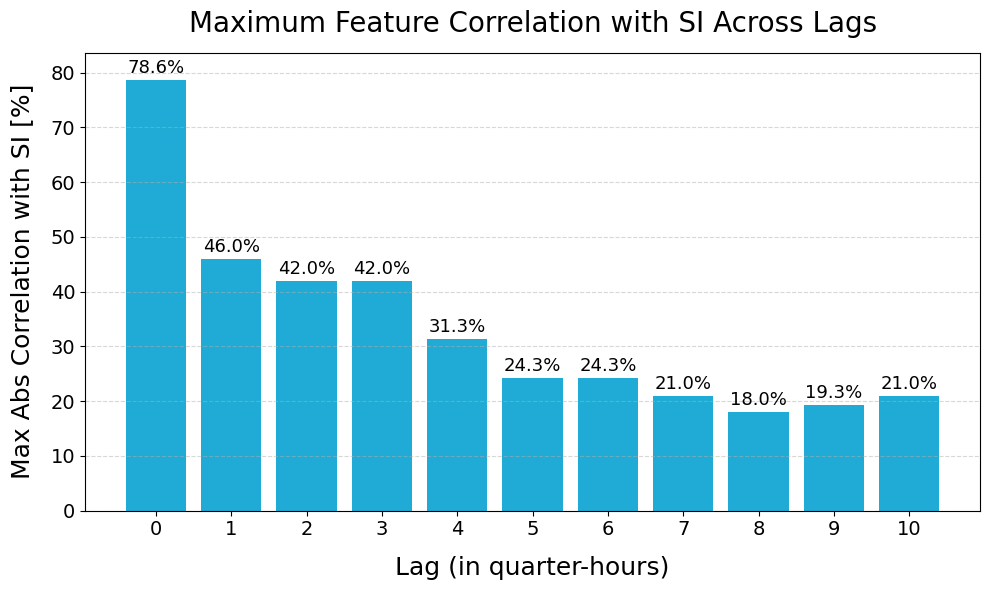

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# --- Set your actual target column name ---
target_col = 'SI_current_qh'  # ← Adjust this to match your data
max_lags = 10
max_corrs = []
df = df.drop('SI_from_qh_plus_1', axis=1)
# --- Compute max correlation for each lag ---
for lag in range(max_lags + 1):
    df_lagged = df.copy()
    feature_cols = [col for col in df.columns if col != target_col]

    df_lagged[feature_cols] = df_lagged[feature_cols].shift(lag)
    df_lagged = df_lagged.dropna()

    corrs = df_lagged.corr()[target_col].drop(target_col)
    max_corr = corrs.abs().max()
    max_corrs.append(max_corr)

# --- Plotting ---
lags = list(range(max_lags + 1))
percentages = [round(v * 100, 1) for v in max_corrs]

fig = plt.figure(figsize=(10, 6))
bars = plt.bar(lags, percentages, color=color)

plt.xlabel("Lag (in quarter-hours)", fontsize=18, labelpad=12)
plt.ylabel("Max Abs Correlation with SI [%]", fontsize=18, labelpad=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add percentage labels
for lag, pct in zip(lags, percentages):
    plt.text(lag, pct + 0.5, f"{pct}%", ha='center', va='bottom', fontsize=13)

plt.ylim(0, max(percentages) + 5)
plt.xticks(lags)
plt.title("Maximum Feature Correlation with SI Across Lags", fontsize=20, pad=15)
plt.tight_layout()
plt.show()

# --- Save if needed ---
output = False
if output:
    fig.savefig("/Users/jds/Desktop/cross_correlations/max_corr_per_lag.png", dpi=300)


In [27]:
def plot_country_correlation(df, country_name):
    """
    Plots an absolute-value correlation matrix for features related to a specific country.
    """
    # Define keywords to search for the country in column names
    keywords = [country_name.lower(), country_name.upper(), country_name.capitalize()]

    # Select relevant columns
    selected_cols = [col for col in df.columns if any(kw in col.lower() for kw in keywords)]

    if not selected_cols:
        print(f"No features found for country: {country_name}")
        return

    # Drop rows with NaNs
    country_subset = df[selected_cols].dropna()

    # Compute absolute correlation
    corr_matrix = country_subset.corr().abs()

    # Plot heatmap
    fig = plt.figure(figsize=(8, 6))
    heatmap = sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        vmin=0,
        vmax=1,
        cbar_kws={"label": "Absolute Correlation Coefficient"},
        annot_kws={"fontsize": 16}
    )
    plt.title(f"Absolute Correlation Matrix – {country_name}", fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=15)
    plt.yticks(rotation=0, fontsize=15)

    # Increase colorbar label font size
    cbar = heatmap.collections[0].colorbar
    cbar.ax.yaxis.label.set_size(16)
    cbar.ax.tick_params(labelsize=12)

    plt.tight_layout()
    plt.show()
    output=False
    if output:
        filename = f"/Users/jds/Desktop/cross_correlations/cross_matrix_{country_name}.png"
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        fig.savefig(filename, dpi=300)


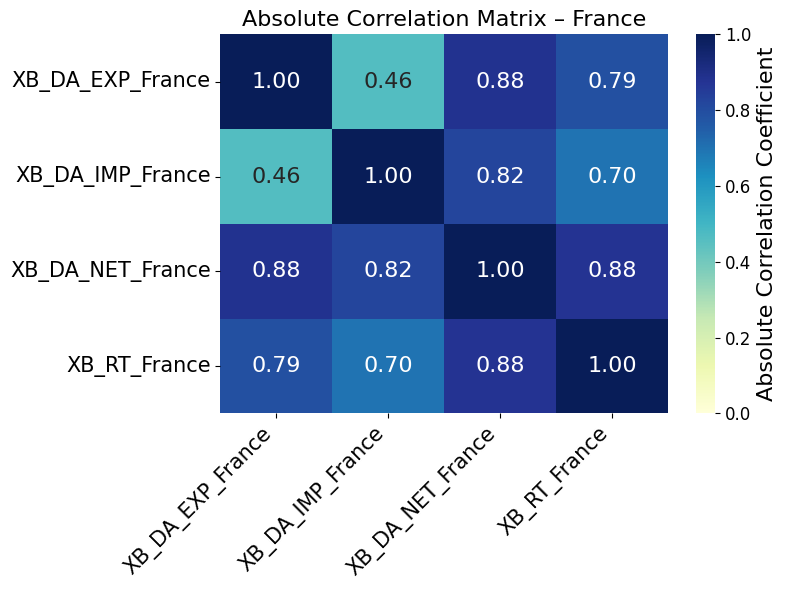

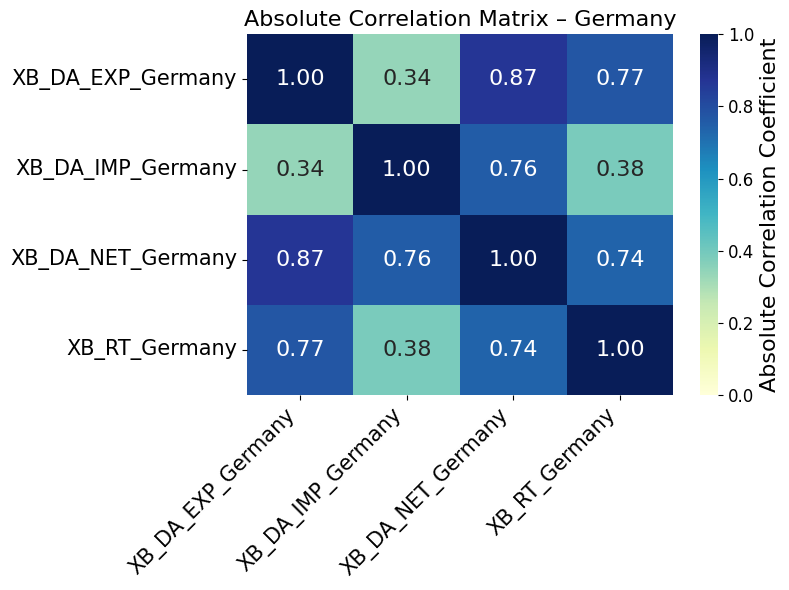

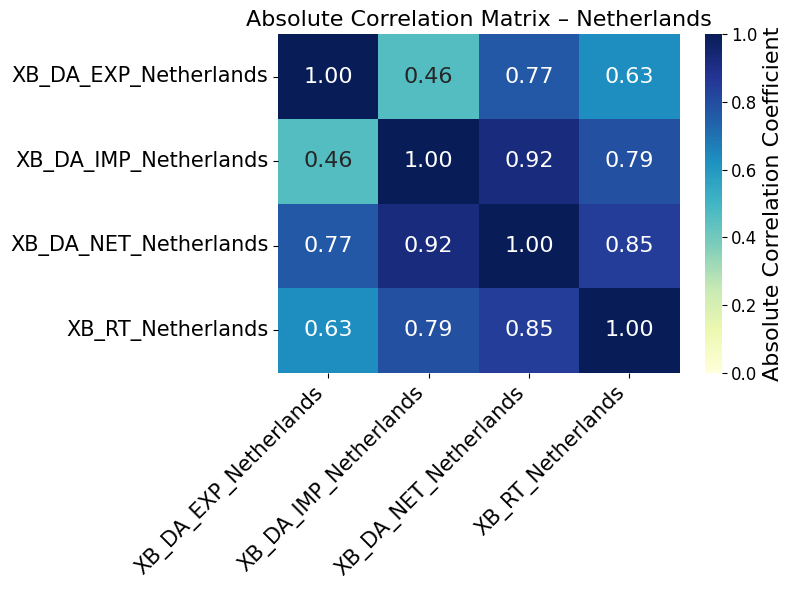

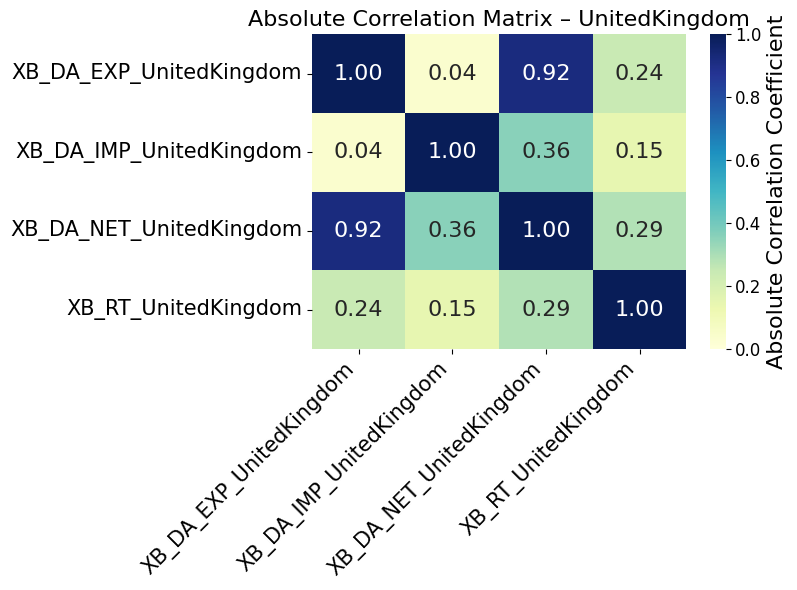

In [28]:
import seaborn as sns

plot_country_correlation(qh, "France")
plot_country_correlation(qh, "Germany")
plot_country_correlation(qh, "Netherlands")
plot_country_correlation(qh, "UnitedKingdom")


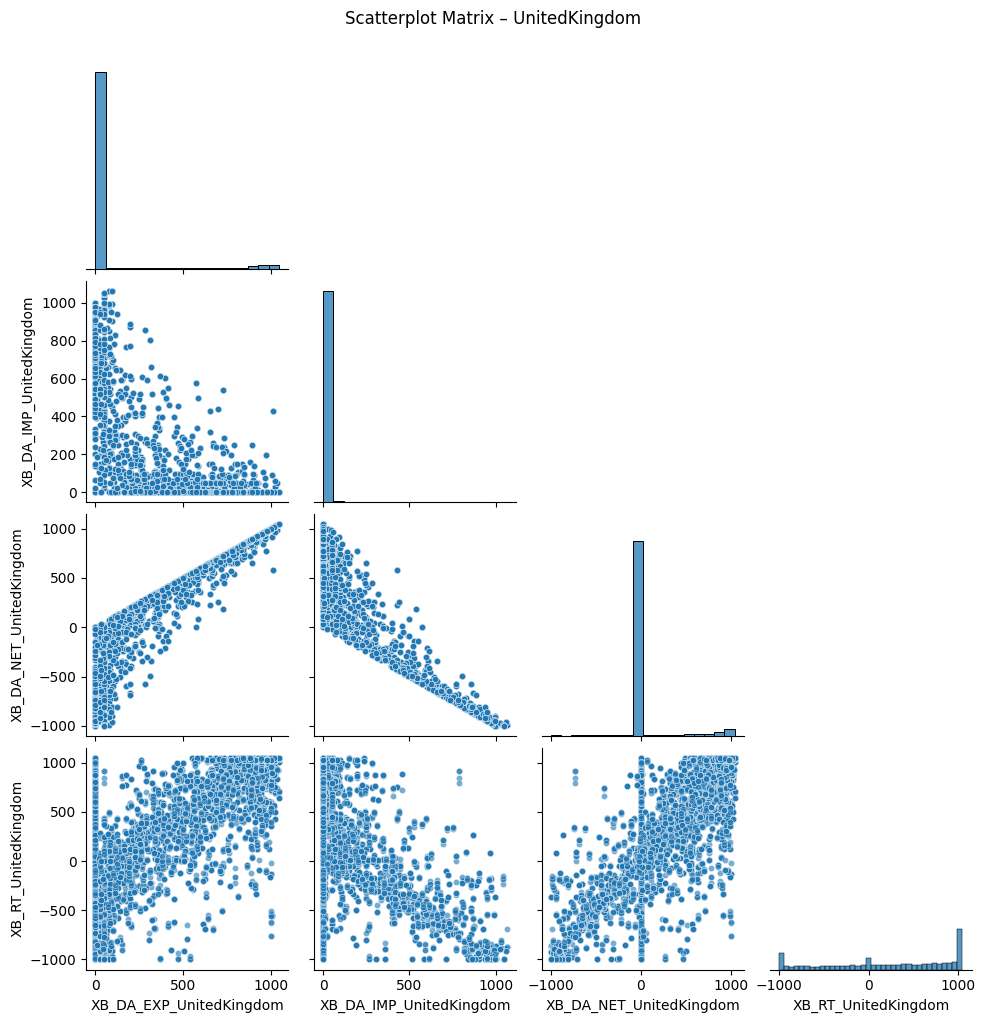

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_country_pairplot(df, country_name):
    """
    Creates a scatterplot matrix (pairplot) for features related to a given country.
    """
    keywords = [country_name.lower(), country_name.upper(), country_name.capitalize()]
    selected_cols = [col for col in df.columns if any(kw in col.lower() for kw in keywords)]

    if not selected_cols:
        print(f"No features found for country: {country_name}")
        return

    country_subset = df[selected_cols].dropna()

    sns.pairplot(country_subset, corner=True, plot_kws={"alpha": 0.6, "s": 20})
    plt.suptitle(f"Scatterplot Matrix – {country_name}", y=1.02)
    plt.show()

plot_country_pairplot(qh, "UnitedKingdom")
